In [98]:
import pandas as pd
import numpy as np
from numpy import random 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import os

In [3]:
df_data = pd.read_csv("EPL_Set.csv")

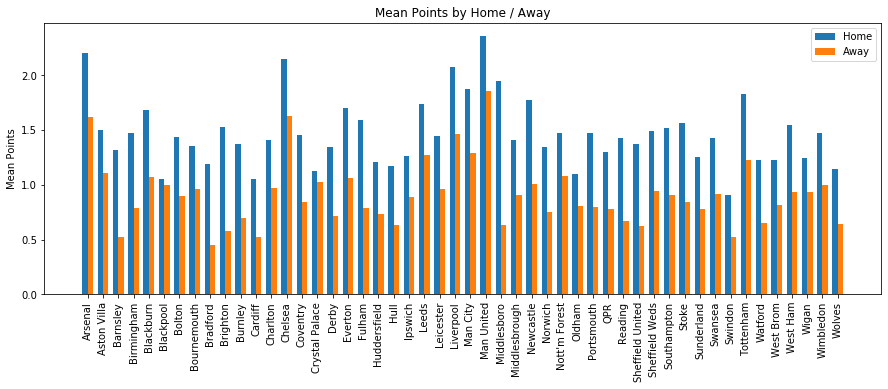

In [89]:
# Representation Graphique des moyennes des points sur l'ensemble des années

labels = list(df_data.groupby('AwayTeam').mean()['Away Points'].index)
home_means = list(df_data.groupby('HomeTeam').mean()['Home Points'])
away_means = list(df_data.groupby('AwayTeam').mean()['Away Points'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - width/2, home_means, width, label='Home')
rects2 = ax.bar(x + width/2, away_means, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Points')
ax.set_title('Mean Points by Home / Away')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

plt.show()

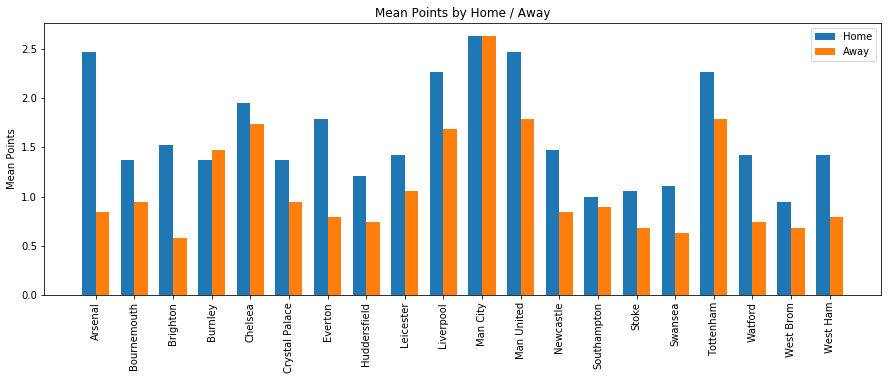

In [97]:
# Representation Graphique des moyennes des points sur la saison 2017 2018

df_data_2 = df_data[df_data['Season']=='2017-18']

labels = list(df_data_2 .groupby('AwayTeam').mean()['Away Points'].index)
home_means = list(df_data_2 .groupby('HomeTeam').mean()['Home Points'])
away_means = list(df_data_2 .groupby('AwayTeam').mean()['Away Points'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - width/2, home_means, width, label='Home')
rects2 = ax.bar(x + width/2, away_means, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Points')
ax.set_title('Mean Points by Home / Away')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

plt.show()

In [100]:
#### Function 1
def all_time_win_ratio(train_df,test_df):
    """"
    This function pulls a team list, iteratives over it to fill a dictionary, and maps the dictionary to a new column in
    the data frame. Win ratio is number of wins/number of games.
    """
    train_df.reset_index(inplace=True)
    team_list = train_df.HomeTeam.unique()
    all_time_ratio = {}
    for team in team_list:
        all_games = train_df.loc[train_df['team'] == team]
        win_ratio = len(all_games[all_games['Points'] == 3])/len(all_games)
        all_time_ratio[team] = win_ratio
    train_df['opp_win_ratio'] = train_df['opponent'].map(all_time_ratio)
    test_df['opp_win_ratio'] = test_df['opponent'].map(all_time_ratio)
    return train_df

#### Function 2
def win_ratio_head2head(train_df,test_df):
    """"
    This function calculates a team's head to head win ratio with every opponent. Outer for loop iterates over a team list,
    inner for loop iterates over every one of that team's opponents. Win ratio against each opponent is calculated and 
    stored in a dict. Dict is mapped to a new column and the dataframe chunk containing the original team's games is appended
    to a list. After both loops close, all the dataframe chunks are concatenated back together.
    """
    team_list = list(train_df.HomeTeam.unique())
    team_list.append('Bournemouth')
    train_chunks = []
    test_chunks = []
    train_df.reset_index(inplace=True)
    test_df.reset_index(inplace=True)
    for team in team_list:
        train_team_games = train_df[train_df['team'] == team]
        test_team_games = test_df[test_df['team'] == team]
        head2head = {}
        opponents = train_team_games['opponent'].unique()
        for opponent in opponents:
            wins = len(train_team_games.loc[(train_team_games['opponent']==opponent) & (train_team_games['Points'] == 3)])
            total = len(train_team_games.loc[(train_team_games['opponent'] == opponent)])
            if wins > 0:
                win_ratio = wins/total
            else:
                win_ratio = 0
            head2head[opponent] = win_ratio
        train_team_games['head2head_win_ratio'] = train_team_games['opponent'].map(head2head)
        test_team_games['head2head_win_ratio'] = test_team_games['opponent'].map(head2head)
        train_chunks.append(train_team_games)
        test_chunks.append(test_team_games)
    train_dataframe = pd.concat(train_chunks,ignore_index=True)
    test_dataframe = pd.concat(test_chunks, ignore_index=True)
    return train_dataframe, test_dataframe

#### Function 3
def add_league_position(df1,df2):
    """
    This function takes two dataframes, the matches DF and the league table DF and adds each opponent's league position
    from last year as a feature. Because we care about a team's previous year results, two list comprehensions are used to 
    create a seasons list and an offset list. The offset list drops the first season and the seasons list drops the last
    season. They are still the same length, but the first season in the offset list is now the second season in the season
    list. This will be used when slicing the two dataframes by the i'th element in the list. Iterating over a range that's 
    the length of the lists lets us work season by season to slice the info we need from the league table DF. Zipping the 
    teams for each season with their respective finishing position gives a dict which is then mapped to a slice of the 
    matches DF. Because of the difference between the offset list and the seasons list, the slice of the matches DF is for
    the season after the key-value pairs contained in the dict. This gives the feature opponent's league finish LAST YEAR.
    Again, chunks are added to a list and then concatenated back together at the end of the function.
    """
    seasons_list1 = double_df['Season'].unique()
    seasons_list2 = seasons.year.unique()
    seasons_offset = [x for x in seasons_list1 if x in seasons_list2]
    seasons_offset.remove('1993-94')
    seasons_list1 = double_df['Season'].unique()
    seasons_list2 = seasons.year.unique()
    seasons_list = [x for x in seasons_list1 if x in seasons_list2]
    seasons_list.remove('2016-17')
    chunk_list = []
    for i in range(len(seasons_offset)):
        current = df2[df2['year']==seasons_list[i]]
        teams = current['Team']
        pos = current['Pos']
        dictionary = dict(zip(teams,pos))
        chunk = df1[df1['Season']==seasons_offset[i]]
        chunk['Opp_League_Finish_Last_Year'] = chunk['opponent'].map(dictionary)
        chunk_list.append(chunk)
    dataframe = pd.concat(chunk_list,ignore_index=True)
    return dataframe

#### Function 4
def home_away_numerical(df):
    """
    Simple function to assign a numerical value to whether a team is home/away. In this case, home=1 away=0. Same methodology
    as above, chunk list to pd.concat().
    """
    team_list = df.HomeTeam.unique()
    chunks = []
    for team in team_list:
        all_games = df[df['team']==team]
        all_games['HomeAway'] = 1
        all_games.loc[all_games['AwayTeam']==team,'HomeAway'] = 0
        chunks.append(all_games)
    dataframe = pd.concat(chunks,ignore_index=True)
    return dataframe

#### Function 5
def win_streak(df):
    """
    Calculates a team's win streak. First iterates over a team list, pulls out all that team's games, intializes a list to
    hold the count and sets a streak counter to 0. The inner for loop iterates over each row of the DF. Regardless of the 
    result the value of streak is appended to the streak_list and then the counter is updated. If the team won, the counter
    is incremented up 1, if the team lost or tied it is reset to 0. When every row of a team's games has been iterated over,
    the list is transposed directly to a new dataframe column. As above, DF chunks are appended to a list and then 
    concatenated at the very end.
    """
    team_list = df['HomeTeam'].unique()
    chunk_list = []
    for team in team_list:
        team_games = double_df.loc[(slice(None),team),:]
        streak_list = []
        streak = 0
        for (season, team, date), data in team_games.iterrows():
            if data['Points'] == 3:
                streak_list.append(streak)
                streak += 1
            elif data['Points'] != 3: 
                streak_list.append(streak)
                streak = 0
        team_games['Streak'] = streak_list
        chunk_list.append(team_games)
    dataframe = pd.concat(chunk_list)
    return dataframe

#### Function 6
def home_away_points(df, season):
    """
    Function takes the matches DF and a given season, calculates mean home and away points, constructs a DF, and then plots
    the results in a bar graph. The figures this function produces are in the written report and blog post.
    """
    team_list = df.loc[season]['HomeTeam'].unique()
    home_points= []
    away_points = []
    for team in team_list:
        team_df = df.loc[(season,team)]
        home = team_df['HomeTeam'] == team
        away = team_df['AwayTeam'] == team
        home_points.append(team_df.loc[home,'Points'].mean().round(2))
        away_points.append(team_df.loc[away, 'Points'].mean().round(2))
    dataframe = pd.DataFrame({'Teams':team_list,'Mean Home Points':home_points,'Mean Away Points' : away_points})
    dataframe.set_index('Teams', inplace=True)
    dataframe.plot(kind='Bar',title='Mean Home and Away Points in ' + season)
    plt.savefig(season)

#### Function 7    
def cumulative_points(df,season):
    """
    Function takes the matches DF and a season and plots the first place, mid table, and last place team's cumulative point
    accumulation vs a randomized point allocation. 
    """
    team_list = df.loc[season]['HomeTeam'].unique()
    most_least_list = []
    most_least_dict = {}
    for team in team_list:
        last_year = df.loc[(season,team)]
        most_least_list.append(last_year['Points'].sum())
        most_least_dict[last_year['Points'].sum()] = team
    most_least_list = sorted(most_least_list)
    best_team = df.loc[(season,most_least_dict[most_least_list[-1]])]
    mid_team = df.loc[(season,most_least_dict[most_least_list[9]])]
    worst_team = df.loc[(season,most_least_dict[most_least_list[0]])]
    best_team = best_team.reset_index(drop=True)
    mid_team = mid_team.reset_index(drop=True)
    worst_team = worst_team.reset_index(drop=True)
    best_cum_points = best_team['Points'].cumsum()
    best_cum_randoms = best_team['Random Points'].cumsum()
    mid_cum_points = mid_team['Points'].cumsum()
    mid_cum_randoms = mid_team['Random Points'].cumsum()
    worst_cum_points = worst_team['Points'].cumsum()
    worst_cum_randoms = worst_team['Random Points'].cumsum()
    best_cum_points.plot(color='blue',label='Top Team Real Results')
    best_cum_randoms.plot(color='red',label='Top Team Random Results')
    mid_cum_points.plot(color='green', label = 'Mid Table Team Real Results')
    mid_cum_randoms.plot(color='yellow', label='Mid Table Team Random Results')
    worst_cum_points.plot(color='brown',label='Bottom Team Real Results')
    worst_cum_randoms.plot(color='black',label='Bottom Team Random Results')
    plt.xlabel('Games')
    plt.ylabel('Points')
    plt.title("Point Total from " + season + ': Expected vs. Actual')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

#### Function 8
def results_and_points(df, team_list):
    """
    Function takes matches DF and a team list and uses complex masking to simplify the target variable into a straightforward
    points value. Of interest is real_x maskes. Random_x was just used to confirm that a random prediction model doesn't work. 
    
    """
    for team in team_list:    
        real_win = ((df['team'] == team) & (df['HomeTeam'] == team) & (df['FTR'] =='H')) |((df['team'] == team) & (df['AwayTeam'] ==team) & (df['FTR'] =='A'))
        real_tie = ((df['team'] == team) & (df['HomeTeam'] == team) & (df['FTR'] =='D')) |((df['team'] == team) & (df['AwayTeam'] ==team) & (df['FTR'] =='D'))
        real_loss = ((df['team'] == team) & (df['HomeTeam'] == team) & (df['FTR'] =='A')) |((df['team'] == team) & (df['AwayTeam'] ==team) & (df['FTR'] =='H'))
        random_win = ((df['team'] == team) & (df['HomeTeam'] == team) & (df['randomResult'] =='H')) |((df['team'] == team) & (df['AwayTeam'] ==team) & (df['randomResult'] =='A'))
        random_tie = ((df['team'] == team) & (df['HomeTeam'] == team) & (df['randomResult'] =='D')) |((df['team'] == team) & (df['AwayTeam'] ==team) & (df['randomResult'] =='D'))
        random_loss = ((df['team'] == team) & (df['HomeTeam'] == team) & (df['randomResult'] =='A')) |((df['team'] == team) & (df['AwayTeam'] ==team) & (df['randomResult'] =='H'))
        df.loc[real_win,'Points']=3
        df.loc[real_tie,'Points']=1
        df.loc[real_loss, 'Points']=0
        df.loc[random_win, 'Random Points'] = 3
        df.loc[random_tie, 'Random Points'] = 1
        df.loc[random_loss, 'Random Points'] = 0
    return df

In [101]:
#Loading in a dataframe of match results and season results and cleaning columns
original_df = pd.read_csv('Epl_Match_Results.csv')
original_df = original_df[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','Season']]
original_df['Date'] = pd.to_datetime(original_df['Date'],dayfirst=True)

#Adding random results with a random integer and changing all the 2's to 3's
original_df['randomResult'] = np.random.randint(0,3,len(original_df))
away_win = original_df['randomResult'] == 0
draw = original_df['randomResult'] == 1
home_win = original_df['randomResult'] == 2               
original_df.loc[home_win,'randomResult'] = 'H'
original_df.loc[draw, 'randomResult'] = 'D'
original_df.loc[away_win, 'randomResult'] = 'A'

#Loading in a second dataframe, seasons, to add league position as a feature in my original_df. Team names are recorded
#differently than in my original_df, as were season titles, so a lot of strings had to be changed.
season_path = 'C:/Users/nhcam/Desktop/Springboard/Premier League Betting Project/Data/seasons_result.csv'
seasons = pd.read_csv(season_path,index_col= 'year')
seasons = seasons.loc['2016/2017':'1993/1994'][['Team','W','L','D','F','A','Pts','Pos']]
seasons = seasons.reset_index()
seasons['year'] = seasons['year'].str.slice_replace(4,7,'-')
seasons['Team'] = seasons['Team'].str.replace('Manchester United', 'Man United')
seasons['Team'] = seasons['Team'].str.replace('Manchester City', 'Man City')
seasons['Team'] = seasons['Team'].str.replace('Tottenham Hotspurs', 'Tottenham')
seasons['Team'] = seasons['Team'].str.replace('West Bromwich Albion', 'West Brom')
seasons['Team'] = seasons['Team'].str.replace('Birmingham City', 'Birmingham')
seasons['Team'] = seasons['Team'].str.replace('Blackburn Rovers', 'Blackburn')
seasons['Team'] = seasons['Team'].str.replace('Bolton Wanderers', 'Bolton')
seasons['Team'] = seasons['Team'].str.replace('Bradford City', 'Bradford')
seasons['Team'] = seasons['Team'].str.replace('Cardiff City', 'Cardiff')
seasons['Team'] = seasons['Team'].str.replace('Charlton Athletic', 'Charlton')
seasons['Team'] = seasons['Team'].str.replace('Coventry City', 'Coventry')
seasons['Team'] = seasons['Team'].str.replace('Derby County', 'Derby')
seasons['Team'] = seasons['Team'].str.replace('Hull City', 'Hull')
seasons['Team'] = seasons['Team'].str.replace('Ipswich Town', 'Ipswich')
seasons['Team'] = seasons['Team'].str.replace('Leeds United', 'Leeds')
seasons['Team'] = seasons['Team'].str.replace('Leicester City', 'Leicester')
seasons['Team'] = seasons['Team'].str.replace('Newcastle United', 'Newcastle')
seasons['Team'] = seasons['Team'].str.replace('Norwich City', 'Norwich')
seasons['Team'] = seasons['Team'].str.replace('Nottingham Forest', "Nott'm Forest")
seasons['Team'] = seasons['Team'].str.replace('Queens Park Rangers', 'QPR')
seasons['Team'] = seasons['Team'].str.replace('Oldham Athletic','Oldham')
seasons['Team'] = seasons['Team'].str.replace('Sheffield Wednesday', 'Sheffield Weds')
seasons['Team'] = seasons['Team'].str.replace('Stoke City', 'Stoke')
seasons['Team'] = seasons['Team'].str.replace('Swansea City', 'Swansea')
seasons['Team'] = seasons['Team'].str.replace('Swindon Town', 'Swindon')
seasons['Team'] = seasons['Team'].str.replace('West Bromwich Albion', 'West Brom')
seasons['Team'] = seasons['Team'].str.replace('West Ham United','West Ham')
seasons['Team'] = seasons['Team'].str.replace('Wolverhampton Wanderers','Wolves')
seasons['year'] = seasons['year'].str.replace('2002-','2002-03')
seasons['year'] = seasons['year'].str.replace('2003-','2003-04')
seasons['year'] = seasons['year'].str.replace('2004-','2004-05')
seasons['year'] = seasons['year'].str.replace('2005-','2005-06')

team_list = original_df.HomeTeam.unique()
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

FileNotFoundError: [Errno 2] File Epl_Match_Results.csv does not exist: 'Epl_Match_Results.csv'

In [ ]:
pd.options.mode.chained_assignment = None
original_df1 = original_df.copy()
original_df1['team'] = original_df1['HomeTeam']
original_df1['opponent'] = original_df1['AwayTeam']
original_df['team'] = original_df1['AwayTeam']
original_df['opponent'] = original_df1['HomeTeam']
double_df = pd.concat([original_df,original_df1])


double_df = results_and_points(double_df, team_list)
double_df = home_away_numerical(double_df)
double_df = add_league_position(double_df,seasons)
double_df.set_index(['Season','team','Date'], inplace=True)
double_df.sort_index(level = 0, inplace=True)

double_df = win_streak(double_df)
double_df.sort_index(level = 0, inplace=True)

train_df = double_df['1994-95':'2014-15']
test_df = double_df.loc['2016-17']

train_df,test_df = win_ratio_head2head(train_df,test_df)

train_df = all_time_win_ratio(train_df,test_df)


train_df.set_index(['Season','team','Date'], inplace=True)

train_df.sort_index(inplace=True, level = [0,1,2])
test_df.set_index(['team','Date'],inplace=True)
test_df.sort_index(inplace=True, level = [0,1])

train_df['Opp_League_Finish_Last_Year'].fillna(20,inplace=True)
test_df['Opp_League_Finish_Last_Year'].fillna(20,inplace=True)
train_df['Result'] = 'Win'
train_df.loc[train_df['Points'] == 1, 'Result'] = 'Draw'
train_df.loc[train_df['Points']== 0, 'Result'] = 'Loss'
test_df['Result'] = 'Win'
test_df.loc[test_df['Points'] == 1, 'Result'] = 'Draw'
test_df.loc[test_df['Points']== 0, 'Result'] = 'Loss'
test_df.head()

In [ ]:
test_df['head2head_win_ratio'].fillna(0,inplace=True)
test_df['opp_win_ratio'].fillna(0,inplace=True)

train_two_target = train_df.copy()
draws = train_two_target['Result']=='Draw'
train_two_target.loc[draws,'Result'] = 'Loss'
loss_draw = train_two_target['Result'] == 'Loss'
train_two_target.loc[loss_draw,'Result'] = 'Loss/Draw'

test_two_target = test_df.copy()
draws = test_two_target['Result']=='Draw'
test_two_target.loc[draws,'Result'] = 'Loss'
loss_draw = test_two_target['Result'] == 'Loss'
test_two_target.loc[loss_draw,'Result'] = 'Loss/Draw'

In [ ]:
X_train = train_two_target.drop(['index','opponent','FTHG','FTAG','HomeTeam','AwayTeam', 'Random Points','randomResult','FTR','Points',
                      'Result'],axis = 1)
y_train = train_two_target['Result']

X_test = test_two_target.drop(['opponent','FTHG','FTAG','HomeTeam','AwayTeam', 'Random Points','randomResult','FTR','Points',
                    'Result'],axis = 1)
y_test = test_two_target['Result']
#logreg_grid = LogisticRegression(multi_class='multinomial',solver = 'lbfgs',max_iter=1000)
#params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#CLF = GridSearchCV(logreg_grid,params,cv = 5,scoring='accuracy')
#CLF.fit(X_train,y_train)
#CLF.best_params_

In [ ]:
logreg = LogisticRegression(max_iter=1000, C = 0.1)
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

In [ ]:
y_pred = logreg.predict(X_train)
rep = classification_report(y_train,y_pred)
print(rep)
print(logreg.coef_)
print(X_test.columns)

In [ ]:
bets_path = 'C:/Users/nhcam/Desktop/Springboard/Premier League Betting Project/Data/E0.csv'
bets = pd.read_csv(bets_path)
bets = bets[['Date','HomeTeam','AwayTeam','FTR','B365H','B365A']]
team_list = test_df.HomeTeam.unique()
team_list.sort()

In [ ]:
def did_I_make_money(team_list,predictions,betting_odds):
    """
    This function takes a list of teams, label predictions made by the model, and a dataframe of bettings odds and returns
    a dataframe from dict of the number of bets and total profit/loss. First, three empty lists are initialized and two 
    counters are set to increment through the unlabeled predictions. Iterating over the team list, the predictions are 
    combined with the result to decide if a bet is placed or not. Anywhere where the model predicts a win becomes a $100
    bet. Then, iterating over the dataframe team_bets created in the outer loop, conditional logic is used to calculate 
    profit or loss. If a bet is placed and the team wins, bet*decimal odds is calculated. If a bet is placed and the team 
    loses, a loss of $110 is posted. Several lists are appended to, a list of teams in alphabetical order to teams, length 
    of team_bets DF where a bet was placed to total_bets, and the sum of team_bets DF proft or loss to money_made_or_lost.
    Counter is incremented at the end of the outside for loop. There are 38 games in a season, so if we look at predictions
    in 38 section chunks we can get predictions for one team at a time. After both loops close a dict is made from the 3 lists
    and then pushed to a DF and returned.
    """
    teams = []
    total_bets = []
    money_made_or_lost = []
    x=0
    x1=38
    for team in team_list:
        team_odds = ((betting_odds['HomeTeam'] == team)|(betting_odds['AwayTeam'] == team))
        team_bets = betting_odds.loc[team_odds]
        team_pred = predictions[x:x1]
        team_bets['Model Prediction'] = team_pred
        team_bets['Bet'] = 100
        no_win = team_bets['Model Prediction'] != 'Win' 
        team_bets.loc[no_win,'Bet'] = 0
        team_bets['Profit/Loss'] = 0
        profit_loss = []
        for index,stats in team_bets.iterrows():
            if (stats['HomeTeam'] == 'Bournemouth') | (stats['AwayTeam'] == 'Bournemouth'):
                profit_loss.append(0)
            elif stats['Model Prediction'] == 'Loss/Draw':
                profit_loss.append(0)
            elif (stats['Model Prediction'] == 'Win'):
                if (stats['HomeTeam'] == team) & (stats['FTR'] == 'H'):
                    profit_loss.append(stats['B365H'] * 100 - 100)
                elif (stats['AwayTeam'] == team) & (stats['FTR'] == 'A'):
                    profit_loss.append(stats['B365A'] * 100 - 100)
                else:
                    profit_loss.append(-100)                                       
        team_bets['Profit/Loss'] = profit_loss
        teams.append(team)
        total_bets.append(len(team_bets.loc[team_bets['Bet'] == 100]))
        money_made_or_lost.append(team_bets['Profit/Loss'].sum())
        x += 38
        x1 += 38
    results = dict(zip(teams,zip(total_bets,money_made_or_lost)))
    betting_results = pd.DataFrame.from_dict(results, orient='index',columns=['Total Bets Placed', 'Profit/Loss'])
    return betting_results

In [ ]:
betting_results = did_I_make_money(team_list,y_pred,bets)
betting_results.sum()

In [ ]:
betting_results.head(20)